In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
plt.rcParams["figure.figsize"] = (20,12)

In [48]:
import warnings 
warnings.filterwarnings('ignore')

In [49]:
#Load datanya!

df = pd.DataFrame(pd.read_csv('survey 2.csv'))

In [50]:
#Lihat dataset nya!

df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [51]:
#Struktur dataset!

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [52]:
df.shape

(1259, 27)

In [53]:
#Persentase missing value

total_missing = df.isnull().sum().sort_values(ascending = False)
total_non_missing = df.count().sort_values(ascending = False)
percent_missing = total_missing/(total_non_missing+total_missing)*100
df_missing = pd.concat([total_missing, total_non_missing, percent_missing], axis = 1, keys = ['Total Missing Values',
                                                                                                                        'Total Non Missing Values',
                                                                                                                        'Persentase Missing Values'])
df_missing.head(10)

,Total Missing Values,Total Non Missing Values,Persentase Missing Values
comments,1095,164,86.973789
state,515,744,40.905481
work_interfere,264,995,20.969023
self_employed,18,1241,1.429706
benefits,0,1259,0.000000
Age,0,1259,0.000000
Gender,0,1259,0.000000
Country,0,1259,0.000000
family_history,0,1259,0.000000
treatment,0,1259,0.000000


In [54]:
#Hapus kolom yang memiliki persentase missing values >= 70%

df.drop('comments', axis=1, inplace=True)
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [55]:
#Pisah data ke kelompok tipe data numerik dan object!

tipe_object = ['Timestamp', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

tipe_numerik = ['Age']

In [56]:
#Statistik sederhana untuk kelompok numerik!

df[tipe_numerik].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1259.0,7.942815e+07,2.818299e+09,-1726.0,27.0,31.0,36.0,1.000000e+11


In [57]:
#Statistik sederhana untuk kelompok object!

df[tipe_object].describe().transpose()

,count,unique,top,freq
Timestamp,1259,1246,2014-08-27 15:23:51,2
Gender,1259,49,Male,615
Country,1259,48,United States,751
state,744,45,CA,138
self_employed,1241,2,No,1095
family_history,1259,2,No,767
treatment,1259,2,Yes,637
work_interfere,995,4,Sometimes,465
no_employees,1259,6,6-25,290
remote_work,1259,2,No,883


## **Imputasi Missing Values**

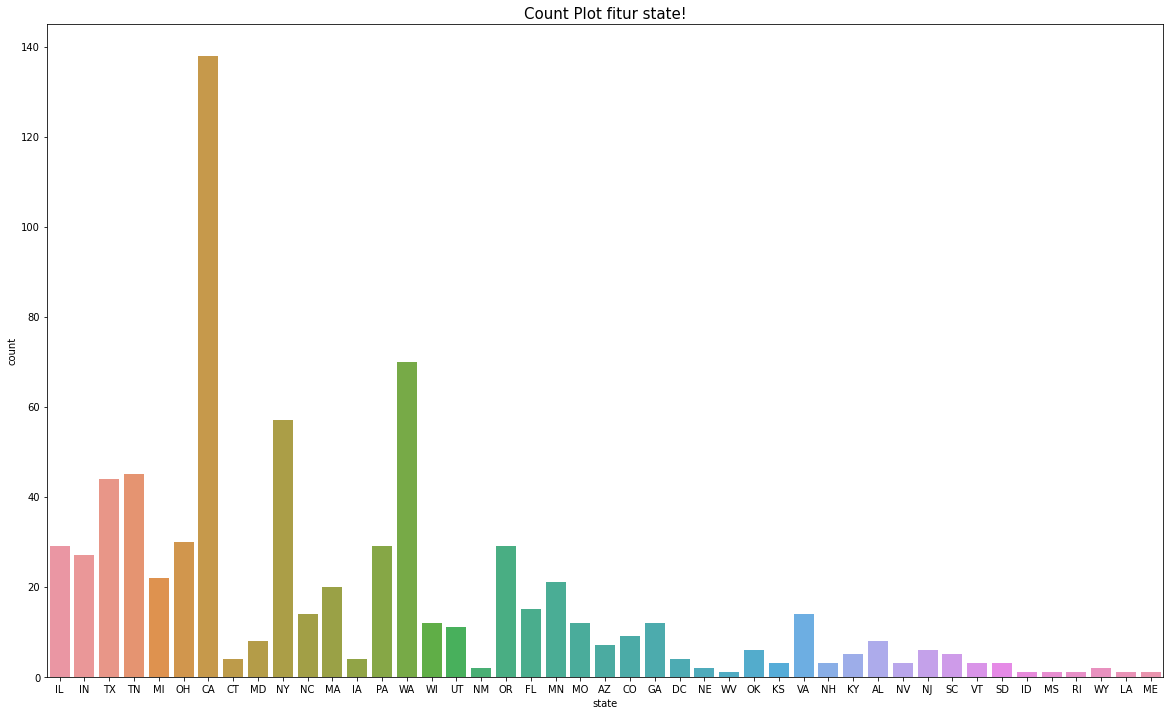

In [58]:
#Visualisasi Kolom 'state'

sns.countplot(df['state'])
plt.title("Count Plot fitur state!", fontsize=15)

plt.show()

In [59]:
# Imputasi Missing Values kolom 'state'

df['state'].fillna(df['state'].mode()[0], inplace = True)

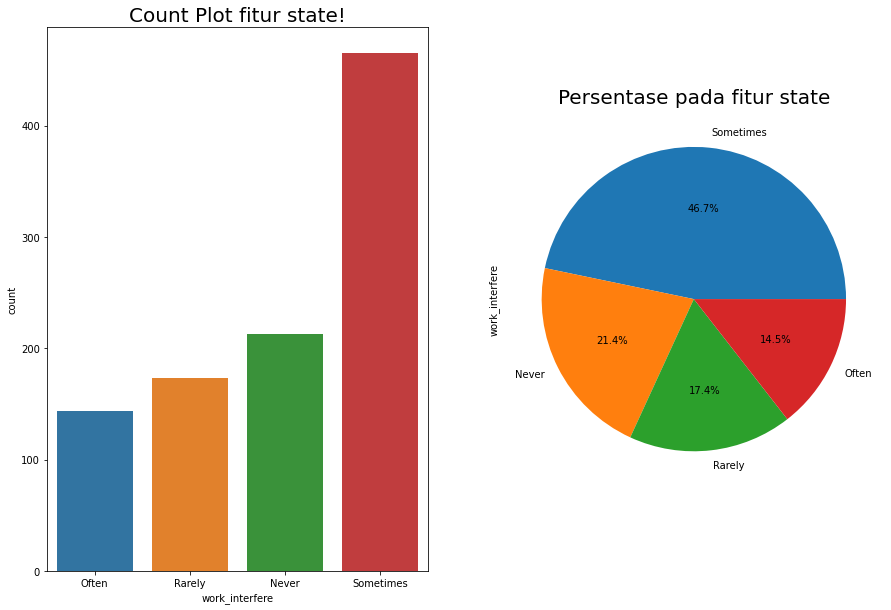

In [60]:
#Visualisasi Kolom 'work_interfere'

plt.subplot(1, 2, 1)
sns.countplot(df['work_interfere'])
plt.title("Count Plot fitur state!", fontsize=20)

plt.subplot(1, 2, 2)
pie_chart = df['work_interfere'].value_counts()
pie_chart.plot.pie(autopct = '%1.1f%%', figsize = (15,10))

plt.title('Persentase pada fitur state', fontsize = 20)

plt.show()

In [61]:
# Imputasi Missing Values kolom 'work_interfere'

df['work_interfere'].fillna(df['work_interfere'].mode()[0], inplace = True)

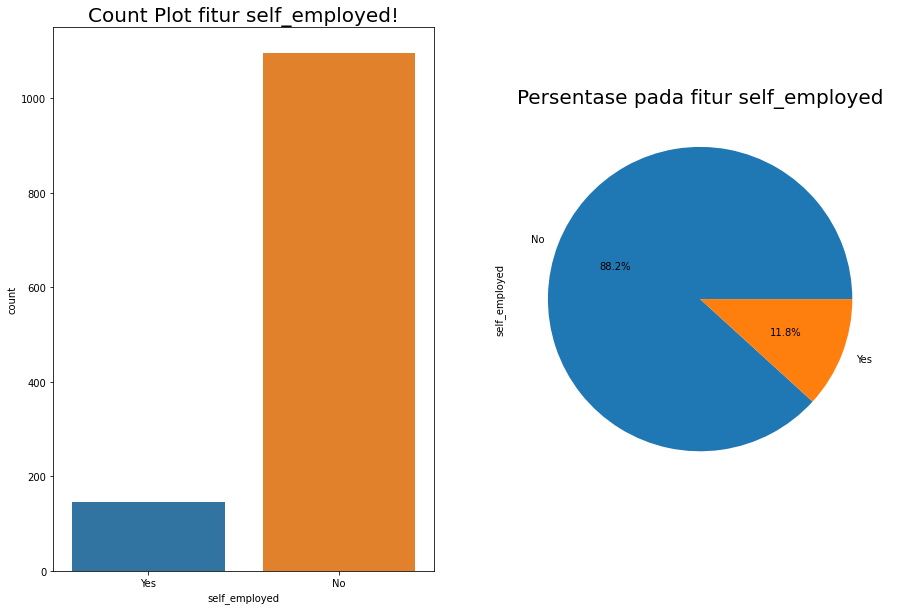

In [62]:
#Visualisasi Kolom 'self_employed'

plt.subplot(1, 2, 1)
sns.countplot(df['self_employed'])
plt.title("Count Plot fitur self_employed!", fontsize=20)

plt.subplot(1, 2, 2)
pie_chart = df['self_employed'].value_counts()
pie_chart.plot.pie(autopct = '%1.1f%%', figsize = (15,10))

plt.title('Persentase pada fitur self_employed', fontsize = 20)

plt.show()

In [63]:
# Imputasi Missing Values kolom 'work_interfere'

df['self_employed'].fillna(df['self_employed'].mode()[0], inplace = True)

In [64]:
# Cek missing values pada data

df.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

## **Data Preprocessing**

In [65]:
#Perhatikan bahwa nilai unik pada fitur Gender berjumlah 49 (Harusnya ada 3, laki-laki, perempuan, atau kategori lainnya)

df['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Man                                                 2
Female (trans)                                      2
Female                                              2
Cis Male                                            2
Male (CIS)                                          1
Malr                                                1
Cis Man                                             1
ostensibly male, unsure what

In [66]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [67]:
#Jadikan 3 Gender saja

df['Gender'].replace(['M', 'Male', 'male', 'm', 'Male-ish', 'maile',
       'something kinda male?', 'Cis Male', 'Mal', 'Male (CIS)', 'Make','Guy (-ish) ^_^', 
       'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr', 'Cis Man'], 'Male', inplace = True)

df['Gender'].replace(['Female', 'female', 'Cis Female', 'F', 
       'Woman', 'f', 'queer/she/they','non-binary', 'Femake', 'woman', 'Genderqueer', 'Female ', 
       'cis-female/femme', 'Female (cis)', 'femail'], 'Female', inplace = True)

df['Gender'].replace(['Trans-female', 'non-binary','Nah', 'All', 'Enby', 'fluid', 'Genderqueer',  'Androgyne', 'Agender',
       'male leaning androgynous', 'Trans woman', 'Neuter', 'Female (trans)','queer','A little about you','p',  'ostensibly male, unsure what that really means'],
       'other_categories', inplace = True)

In [68]:
df['Gender'].value_counts()

Male                993
Female              250
other_categories     16
Name: Gender, dtype: int64

In [69]:
# Perhatikan bahwa nilai fitur Age atau umur ada yang negatif dan ada yang lebih besar dari 100 (bahkan 1000 an)
# Ganti nilai2 aneh tsb dengan median

df['Age'] = df[(df['Age'] >= 0) & (df['Age'] <= 100)]['Age']
df['Age'].fillna(df['Age'].median(), inplace = True)

df['Age'].describe()

count    1259.000000
mean       32.015091
std         7.360613
min         5.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

In [70]:
#Hapus kolom Timestamp yang sekiranya kurang berguna

df.drop('Timestamp', axis = 1, inplace = True)

## **Modelling**

In [71]:
df['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

In [72]:
#Ubah variabel kategorik ke numerik!

df['treatment'].replace('Yes', 1, inplace = True)
df['treatment'].replace('No', 0, inplace = True)

df = pd.get_dummies(df)
df.shape

(1259, 159)

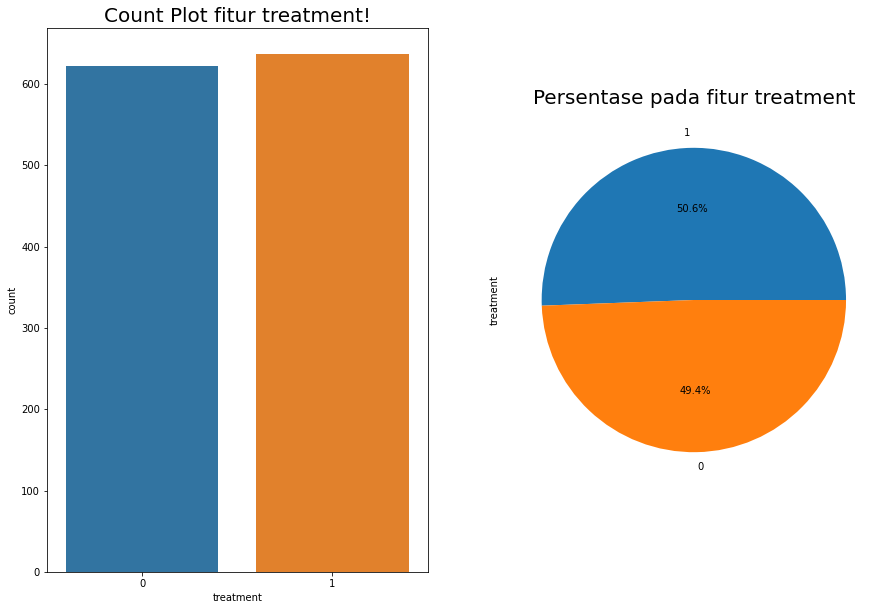

In [73]:
#Visualisasi variabel target 'treatment'

plt.subplot(1, 2, 1)
sns.countplot(df['treatment'])
plt.title("Count Plot fitur treatment!", fontsize=20)

plt.subplot(1, 2, 2)
pie_chart = df['treatment'].value_counts()
pie_chart.plot.pie(autopct = '%1.1f%%', figsize = (15,10))

plt.title('Persentase pada fitur treatment', fontsize = 20)

plt.show()

In [74]:
# Pisah dataset menjadi variabel2 prediktor dan variabel target

X = df.drop('treatment', axis = 1)
y = df['treatment']

In [75]:
X.shape

(1259, 158)

In [76]:
y.shape

(1259,)

In [77]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [80]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, solver="sag")
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       124
           1       0.78      0.71      0.75       128

    accuracy                           0.75       252
   macro avg       0.76      0.75      0.75       252
weighted avg       0.76      0.75      0.75       252



In [81]:
#Skor ROC-AUC Model Gradient Boosting (Setelah Hyperparameter Tuning)

print(roc_auc_score(y_test, y_pred))

0.7546622983870968


In [82]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion="gini", max_depth=8)
dec_tree.fit(X_train, y_train)

y_pred_dectree = dec_tree.predict(X_test)
print(classification_report(y_test, y_pred_dectree))

              precision    recall  f1-score   support

           0       0.65      0.77      0.70       124
           1       0.72      0.59      0.65       128

    accuracy                           0.68       252
   macro avg       0.69      0.68      0.68       252
weighted avg       0.69      0.68      0.68       252



In [83]:
#Skor ROC-AUC Model Gradient Boosting (Setelah Hyperparameter Tuning)

print(roc_auc_score(y_test, y_pred))

0.7546622983870968


In [84]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
r_forest=RandomForestClassifier(max_depth=22, warm_start=True)
r_forest.fit(X_train,y_train)

y_pred_forest = r_forest.predict(X_test)
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       124
           1       0.75      0.69      0.72       128

    accuracy                           0.73       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.73      0.73      0.73       252



In [85]:
#Skor ROC-AUC Model Gradient Boosting (Setelah Hyperparameter Tuning)

print(roc_auc_score(y_test, y_pred))

0.7546622983870968


In [86]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gboost=GradientBoostingClassifier(learning_rate=0.2)
gboost.fit(X_train, y_train)

y_pred_gboost = gboost.predict(X_test)
print(classification_report(y_test, y_pred_gboost))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       124
           1       0.77      0.67      0.72       128

    accuracy                           0.73       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.73      0.73      0.73       252



In [87]:
#Skor ROC-AUC Model Gradient Boosting (Setelah Hyperparameter Tuning)

print(roc_auc_score(y_test, y_pred))

0.7546622983870968


In [88]:
#Logistic Regression dengan Hyperparameter Tuning

hyperparameters = dict(penalty=['l1', 'l2', 'elasticnet'], C=np.logspace(-4,4,20))
clf = GridSearchCV(logreg, hyperparameters, cv=5)

#Fitting Model
logreg_best_model = clf.fit(X_train,y_train)

#Print hyperparameters terbaik
print('Best Penalty:', logreg_best_model.best_estimator_.get_params()['penalty'])
print('Best C:', logreg_best_model.best_estimator_.get_params()['C'])

#Prediksi dengan model hasil parameter tuning
y_pred = logreg_best_model.predict(X_test)

print(classification_report(y_test, y_pred))

Best Penalty: l2
Best C: 0.08858667904100823
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       124
           1       0.77      0.72      0.74       128

    accuracy                           0.75       252
   macro avg       0.75      0.75      0.75       252
weighted avg       0.75      0.75      0.75       252



In [89]:
#Skor ROC-AUC Model Gradient Boosting (Setelah Hyperparameter Tuning)

print(roc_auc_score(y_test, y_pred))

0.7505040322580645


In [90]:
#Decision Tree dengan Hyperparameter Tuning

dectree_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(1,10),
    'min_samples_split' : range(1,5),
    'min_samples_leaf' : range(1,5)
}

clf = GridSearchCV(dec_tree, dectree_params, cv=5)

#Fitting Model
dectree_best_model = clf.fit(X_train,y_train)

#Print hyperparameters terbaik
print('Best Hyperparameters:', dectree_best_model.best_estimator_.get_params())

#Prediksi dengan model hasil parameter tuning
y_pred = dectree_best_model.predict(X_test)

print(classification_report(y_test, y_pred))

Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       124
           1       0.77      0.69      0.73       128

    accuracy                           0.74       252
   macro avg       0.74      0.74      0.74       252
weighted avg       0.74      0.74      0.74       252



In [91]:
#Skor ROC-AUC Model Gradient Boosting (Setelah Hyperparameter Tuning)

print(roc_auc_score(y_test, y_pred))

0.7389112903225805


In [92]:
#Gradient Boosting Classifier dengan Hyperparameter Tuning

gb_params = {
              'learning_rate': [0.05, 0.1, 0.2, 0.3],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              'max_features': ['auto', 'sqrt', 'log2', 'None'] 
              }

clf = GridSearchCV(gboost, gb_params, cv=5)

#Fitting Model
gboost_best_model = clf.fit(X_train,y_train)

#Print hyperparameters terbaik
print('Best Hyperparameters:', gboost_best_model.best_estimator_.get_params())

#Prediksi dengan model hasil parameter tuning
y_pred = gboost_best_model.predict(X_test)

print(classification_report(y_test, y_pred))

Best Hyperparameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       124
           1       0.80      0.70      0.75       128

    accuracy                           0.76       252
   macro avg       0.76      0.76      0.76       252
weighted avg       0.76      0.76      0.76       252



In [93]:
#Skor ROC-AUC Model Gradient Boosting (Setelah Hyperparameter Tuning)

print(roc_auc_score(y_test, y_pred))

0.758820564516129


In [94]:
import simplejson as json

In [96]:
class MyLogReg(LogisticRegression):

    # Override the class constructor
    def __init__(self, C=0.08858667904100823, solver='liblinear', max_iter=100, X_train=None, Y_train=None):
        LogisticRegression.__init__(self, C=C, solver=solver, max_iter=max_iter)
        self.X_train = X_train
        self.Y_train = y_train

    # A method for saving object data to JSON file
    def save_json(self, filepath):
        dict_ = {}
        dict_['C'] = self.C
        dict_['max_iter'] = self.max_iter
        dict_['solver'] = self.solver
        dict_['X_train'] = self.X_train.values.tolist() if self.X_train is not None else 'None'
        dict_['Y_train'] = self.Y_train.values.tolist() if self.Y_train is not None else 'None'

        # Creat json and save to file
        json_txt = json.dumps(dict_, indent=4)
        with open(filepath, 'w') as file:
            file.write(json_txt)

    # A method for loading data from JSON file
    def load_json(self, filepath):
        with open(filepath, 'r') as file:
            dict_ = json.load(file)

        self.C = dict_['C']
        self.max_iter = dict_['max_iter']
        self.solver = dict_['solver']
        self.X_train = np.asarray(dict_['X_train']) if dict_['X_train'] != 'None' else None
        self.Y_train = np.asarray(dict_['Y_train']) if dict_['Y_train'] != 'None' else None

In [97]:
filepath = "LOGREG_BANGKIT.json"

# Create a model and train it
mylogreg = MyLogReg(X_train=X_train, Y_train=y_train)  
mylogreg.save_json(filepath)

# Create a new object and load its data from JSON file
json_mylogreg = MyLogReg()  
json_mylogreg.load_json(filepath)  
json_mylogreg

MyLogReg(X_train=array([[32.,  0.,  1., ...,  0.,  1.,  0.],
       [48.,  0.,  1., ...,  1.,  0.,  1.],
       [33.,  1.,  0., ...,  1.,  1.,  0.],
       ...,
       [33.,  0.,  1., ...,  1.,  1.,  0.],
       [36.,  0.,  1., ...,  1.,  1.,  0.],
       [34.,  0.,  1., ...,  1.,  1.,  0.]]),
         Y_train=array([0, 1, 0, ..., 1, 0, 0]))